# Librerias

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras as kr
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [52]:
from sklearn.model_selection import train_test_split

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

## Datos Clave

In [8]:
path_temp='C:/Users/ccollazos/Documents/Summan/Corona/TEMP_MINUTOS_summan.csv'
dftemp=pd.read_csv(path_temp, low_memory=True, index_col=[0], parse_dates=True, delimiter=';',date_format='%d/%m/%Y %H:%M', dayfirst=True)
dftemp.sort_index(inplace=True)
dftemp=dftemp.resample("min").first()
dftemp=dftemp.interpolate(method='time')

In [5]:
path_gas='C:/Users/ccollazos/Documents/Summan/Corona/datos_gas_horno4.csv'
dfgas=pd.read_csv(path_gas, index_col=[0], parse_dates=True)

### Analisis de temp por separado

<Axes: >

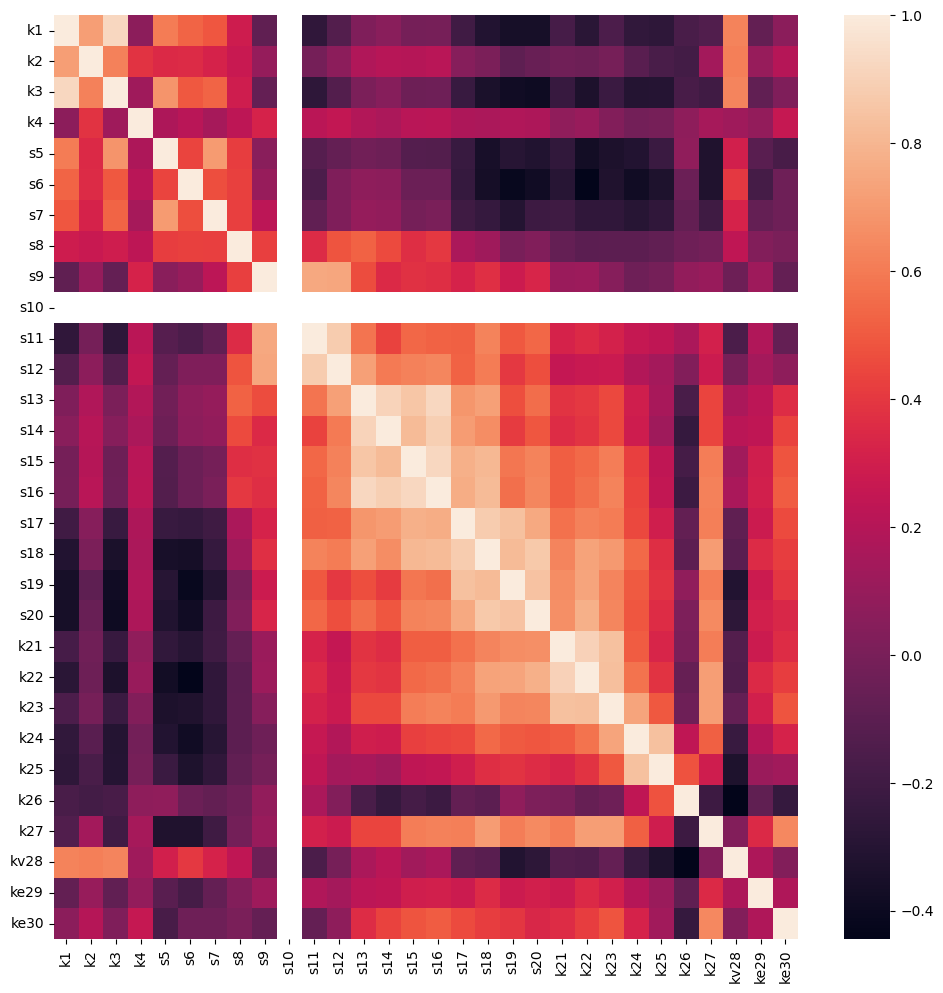

In [31]:
plt.figure(figsize=(12,12))
sns.heatmap(dftemp.corr())


In [1]:
col_cont=["s6","s8","s10","s12","s13","s14", "s15","s16", "s17","s18","s19","s20", "k23","k26","k27"]
col_setpoints={"ke30": 120,"ke29": 160,"k4": 350,"s6": 490,"s8": 740,"s10": 1020,"s12": 1134,"s13": 1218,"s14": 1213,"s15": 1222,"s16": 1215,"s17": 1201,"s18": 1183,"s19": 1100,"s20": 1106,"k23": 620,"k26": 290,"k27": 110}

In [20]:
#temperaturas dentro del horno
col_temp=['k2','k4','s6','s8','s10','s12','s14','s16','s18','s20','k22','k23','k24','k25','k26']
col_temp_2=['k1','k3','s5','s7','s9','s11','s13','s15','s17','s19','k21','k23','k24','k25','k26']

In [21]:
set_sin_cont=[i for i in list(col_setpoints.keys()) if i not in col_cont ]

In [33]:
set_sin_cont

['ke30', 'ke29', 'k4']

In [27]:
variables_libres=[i for i in dftemp.columns if i not in list(col_setpoints.keys())]

In [28]:
variables_libres

['k1', 'k2', 'k3', 's5', 's7', 's9', 's11', 'k21', 'k22', 'k24', 'k25', 'kv28']

<Axes: >

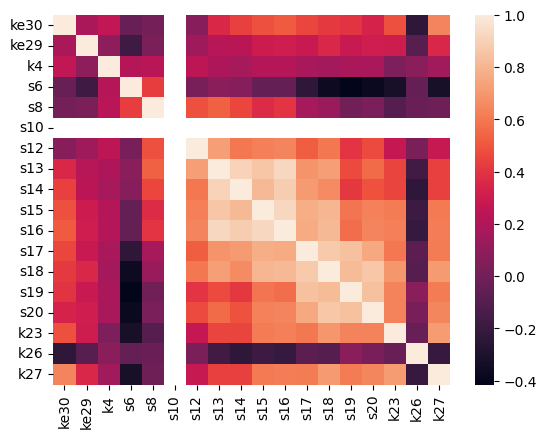

In [ ]:
sns.heatmap(dftemp.loc[:,list(col_setpoints.keys())].corr())

<Axes: >

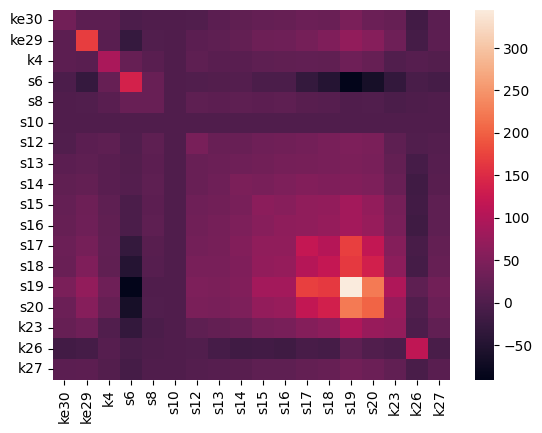

In [30]:
sns.heatmap(dftemp.loc[:,list(col_setpoints.keys())].cov())

<Axes: >

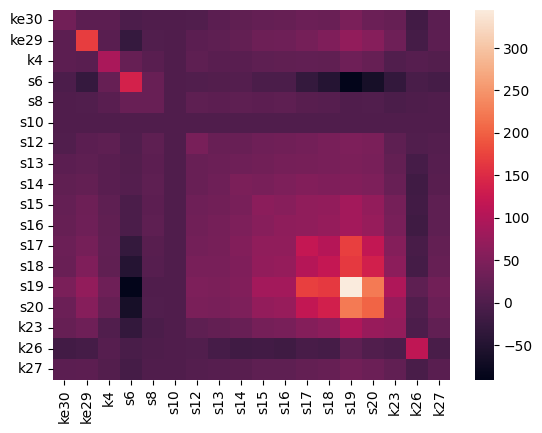

In [23]:
sns.heatmap(dftemp.loc[:,list(col_setpoints.keys())].cov())

In [13]:
dftemp.loc[:,list(col_setpoints.keys())].describe().T

,count,mean,std,min,25%,50%,75%,max
ke30,256613.0,112.176363,5.991043,38.0,110.0,110.0,115.0,128.0
ke29,256613.0,156.798175,12.994993,44.0,160.0,160.0,161.0,193.0
k4,256613.0,332.345565,9.583185,176.0,326.0,332.0,339.0,396.0
s6,256613.0,497.431765,11.764004,0.0,490.0,496.0,502.0,721.0
s8,256613.0,740.371156,5.018196,488.0,738.0,740.0,742.0,837.0
s10,256613.0,1020.000000,0.000000,1020.0,1020.0,1020.0,1020.0,1020.0
s12,256613.0,1131.004834,6.572523,776.0,1129.0,1133.0,1134.0,1142.0
s13,256613.0,1217.052749,5.391478,827.0,1217.0,1217.0,1218.0,1223.0
s14,256613.0,1209.953159,6.783844,0.0,1209.0,1210.0,1212.0,1217.0
s15,256613.0,1220.099445,7.862113,0.0,1219.0,1221.0,1222.0,1227.0


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

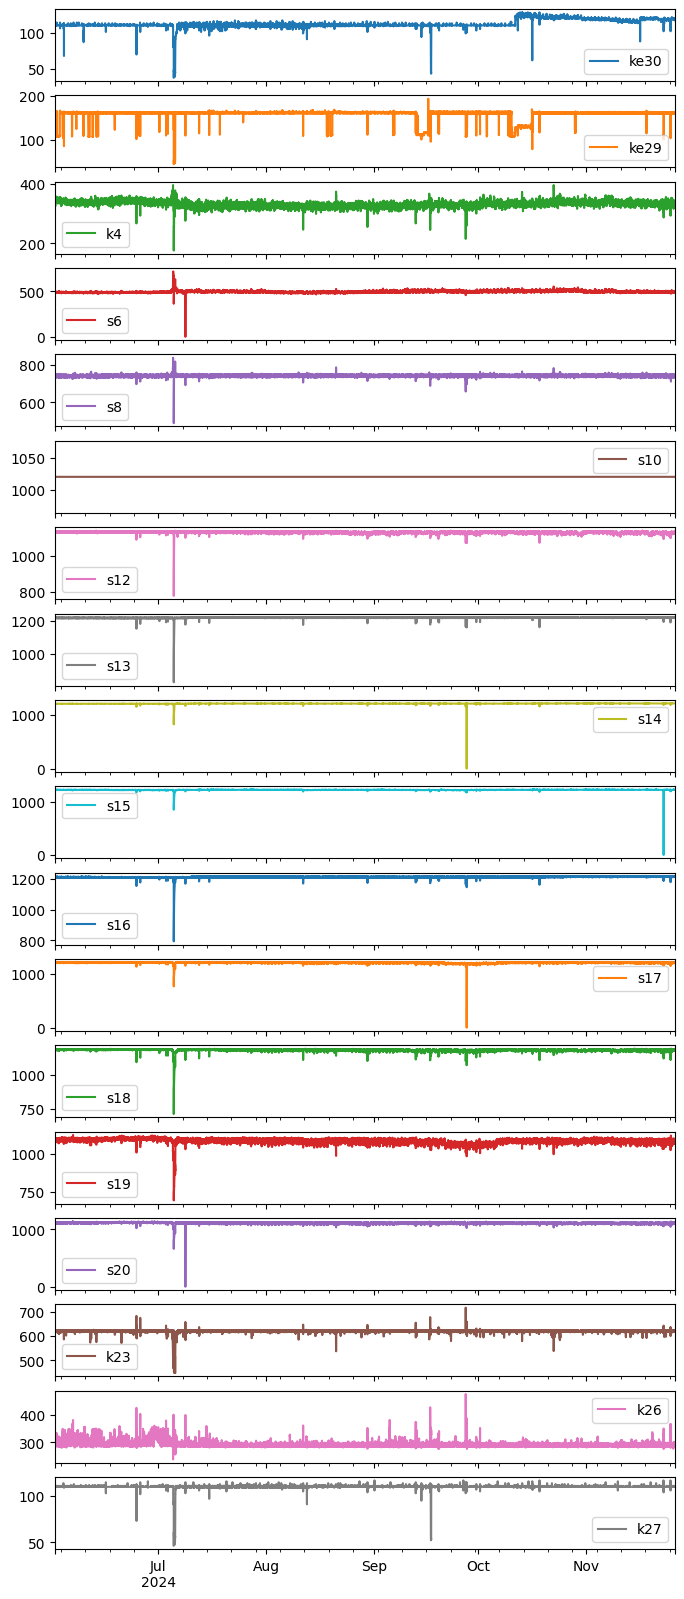

In [10]:
dftemp.loc[:,list(col_setpoints.keys())].plot(subplots=True, figsize=(8,20))

In [70]:
var_con_cont=list(col_setpoints.keys())

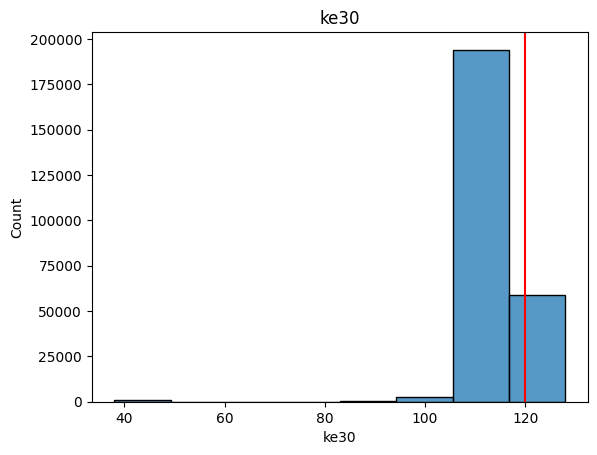

In [86]:
sns.histplot(dftemp,x=var_con_cont[0],bins=8)
plt.title(var_con_cont[0])
plt.axvline(x=col_setpoints[var_con_cont[0]],color='r')

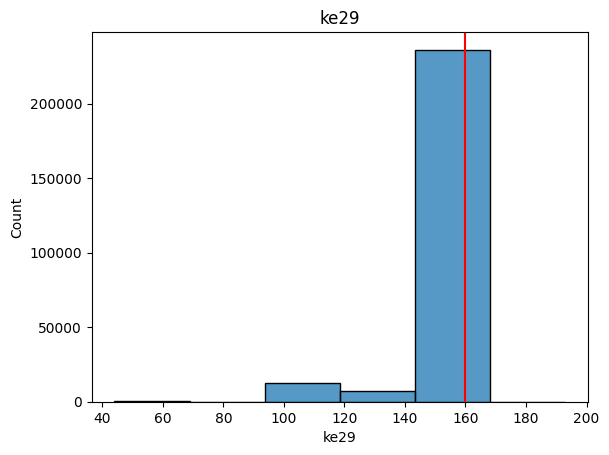

In [94]:
sns.histplot(dftemp,x=var_con_cont[1],bins=6)
plt.title(var_con_cont[1])
plt.axvline(x=col_setpoints[var_con_cont[1]],color='r')

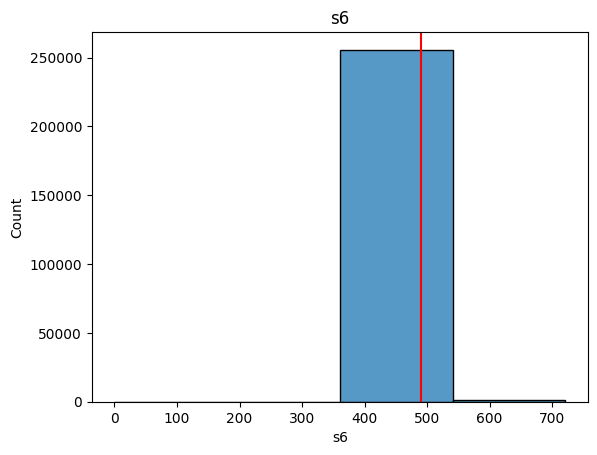

In [95]:
sns.histplot(dftemp,x=var_con_cont[3],bins=4)
plt.title(var_con_cont[3])
plt.axvline(x=col_setpoints[var_con_cont[3]],color='r')

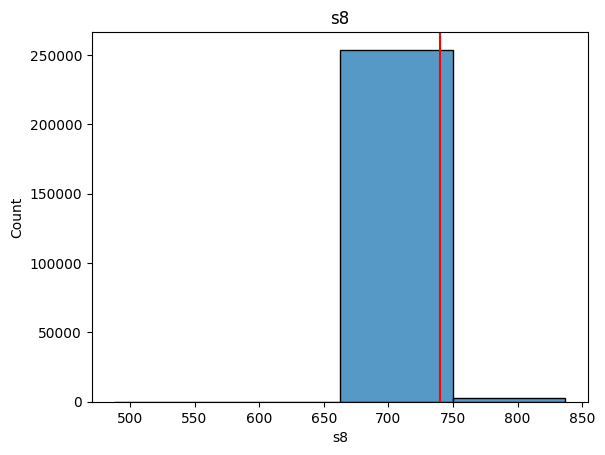

In [98]:
sns.histplot(dftemp,x=var_con_cont[4],bins=4)
plt.title(var_con_cont[4])
plt.axvline(x=col_setpoints[var_con_cont[4]],color='r')

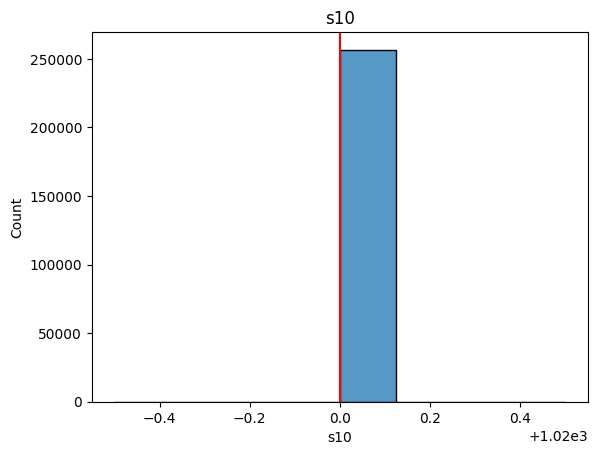

In [99]:
sns.histplot(dftemp,x=var_con_cont[5],bins=8)
plt.title(var_con_cont[5])
plt.axvline(x=col_setpoints[var_con_cont[5]],color='r')

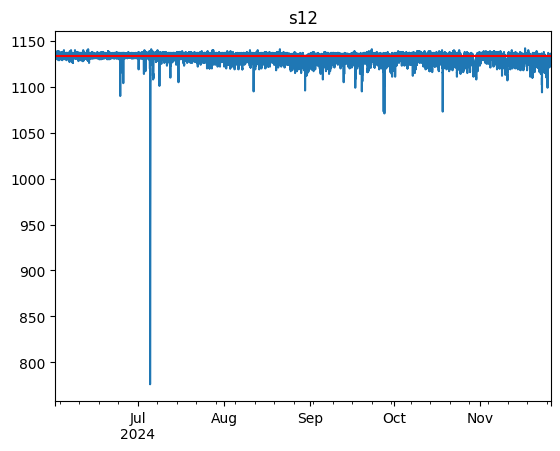

In [103]:
dftemp.loc[:,var_con_cont[6]].plot()
plt.title(var_con_cont[6])
plt.axhline(y=col_setpoints[var_con_cont[6]],color='r')

### Respresentacion

In [35]:
X_set=dftemp.loc[:,col_setpoints.keys()].values
y_val=dftemp.loc[:,variables_libres].values

In [44]:
features_=dftemp.loc[:,col_setpoints.keys()].columns

In [53]:
X_train, X_test, y_train, y_test = train_test_split( X_set, y_val, test_size=0.33)

In [54]:
modelo_rf=RandomForestRegressor().fit(X_train,y_train)

In [55]:
for i,j in zip(modelo_rf.feature_importances_,features_):
    print(j," ",np.round(i*100,2))

ke30   3.5
ke29   1.89
k4   9.33
s6   25.8
s8   3.67
s10   0.0
s12   4.4
s13   1.62
s14   8.95
s15   3.21
s16   2.96
s17   3.42
s18   3.29
s19   12.59
s20   4.76
k23   5.21
k26   5.01
k27   0.4


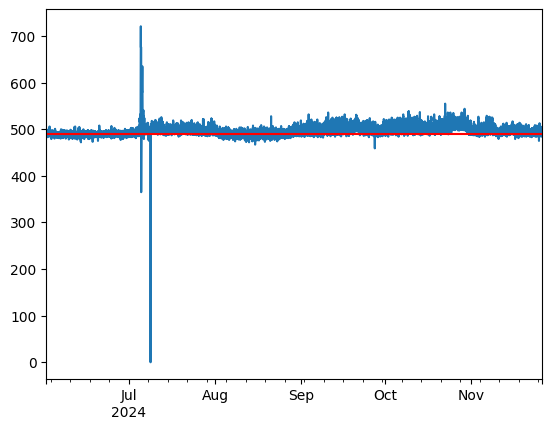

In [68]:
dftemp['s6'].plot()
plt.axhline(y=col_setpoints['s6'],color='r')

In [56]:
ypred_=modelo_rf.predict(X_test)

In [57]:
mean_squared_error(y_test,ypred_)

16.042672637353434

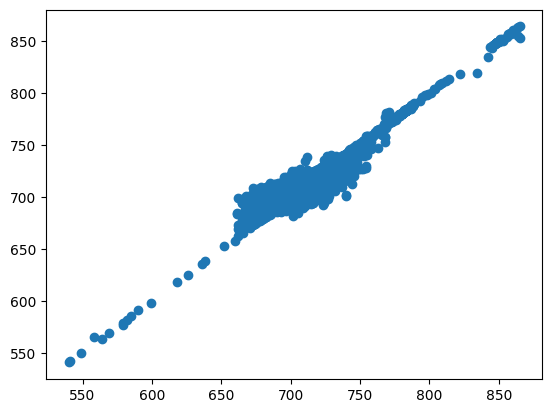

In [62]:
plt.scatter(y_test[:,4],ypred_[:,4])